### Ejercicio 27: Transporte

Una empresa desea distribuir sus productos en España desde sus centros de producción (Madrid, Barcelona, San Sebastián y Sevilla) hasta las 47 provincias peninsulares. Cada península tiene una demanda mínima a satisfacer y cada centro de producción una capacidad máxima de fabricación. Se desea satisfacer las necesidades de demanda de cada provincia, minimizando el coste de transporte. Los costes de transportar 100 tm de producto entre provincias, las capacidades máximas y las demandas mínimas se encuentran en el archivo "DatosEj27".

$$
\begin{equation*}
    \begin{aligned}&\text{min}&& z=\sum_{ij}c_{ij}F_{ij} \\
    & \text{sujeto a:} \\
    &  && \sum_{j}F_{ij} \leq cap_i \quad\forall  i && \\
    &  && \sum_{i}F_{ij} \geq dem_j  \quad \forall  j && \\
    &  && F_{ij} \geq 0 
    \end{aligned}
    \end{equation*}
$$

#### Importamos Pyomo

In [1]:
from pyomo.environ import *
import pandas as pd
import numpy as np


In [2]:
df_dist = pd.read_excel('Datos/DatosEj27.xlsx', sheet_name = 'Distancia',index_col=0)
df_prod = pd.read_excel('Datos/DatosEj27.xlsx', sheet_name = 'Produccion',index_col=0)
df_dem = pd.read_excel('Datos/DatosEj27.xlsx', sheet_name = 'Demanda' ,index_col=0)
comunidades = df_dist.index
print(comunidades)

Index(['Albacete', 'Alicante', 'Almería', 'Avila', 'Badajoz', 'Barcelona',
       'Bilbao', 'Burgos', 'Cáceres', 'Cádiz', 'Castellón', 'Ciudad Real',
       'Córdoba', 'A Coruña', 'Cuenca', 'Gerona', 'Granada', 'Guadalajara',
       'Huelva', 'Huesca', 'Jaén', 'León', 'Lérida', 'Logroño', 'Lugo',
       'Madrid', 'Málaga', 'Murcia', 'Orense', 'Oviedo', 'Palencia',
       'Pamplona', 'Pontevedra', 'Salamanca', 'S.Sebastián', 'Santander',
       'Segovia', 'Sevilla', 'Soria', 'Tarragona', 'Teruel', 'Toledo',
       'Valencia', 'Valladolid', 'Vitoria', 'Zamora', 'Zaragoza'],
      dtype='object')


#### Creamos un problema concreto, es decir, un objeto de la clase problema que ya contenga parámetros

In [3]:
model = ConcreteModel()

#### Necesitamos utilizar sets

In [4]:
model.com=Set(initialize=comunidades)

#### Definimos las variables

In [5]:
model.transp=Var(model.com, model.com, within=NonNegativeReals)

#### Definimos la función objetivo

In [6]:
model.obj = Objective(expr = sum(model.transp[c,cc]*(df_dist[c][cc]) for c in model.com for cc in model.com ), sense=minimize)

#### Definimos la restricciones

In [7]:
model.mindem = ConstraintList()
for c in model.com:
    model.mindem.add(
        sum(model.transp[a,c] for a in model.com)>=df_dem['Demanda'][c]
    )

model.maxcap = ConstraintList()
for c in model.com:
    model.maxcap.add(
        sum(model.transp[c,a] for a in model.com)<=df_prod['Capacidad'][c]
    )

#### Resolvemos el problema

In [8]:
results = SolverFactory('glpk').solve(model)
results.write()   

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 51109644.0
  Upper bound: 51109644.0
  Number of objectives: 1
  Number of constraints: 95
  Number of variables: 2210
  Number of nonzeros: 4419
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.09773826599121094
# ----------------------------------------------------------
#   Solution Information
# --------------------

#### Exportamos a Excel

In [9]:
res = model.transp.extract_values()
result = list(res.values())
df2 = pd.DataFrame(index=comunidades, columns=comunidades)
i=0
for c in comunidades:
    i+=1
    j = 0
    for cc in comunidades:
        ind=(i-1)*(len(comunidades))+j
        df2[cc][c]=result[ind]
        j+=1
df2.to_excel('Resultados/ResultadosEj27.xlsx')
tran =df2.to_numpy()

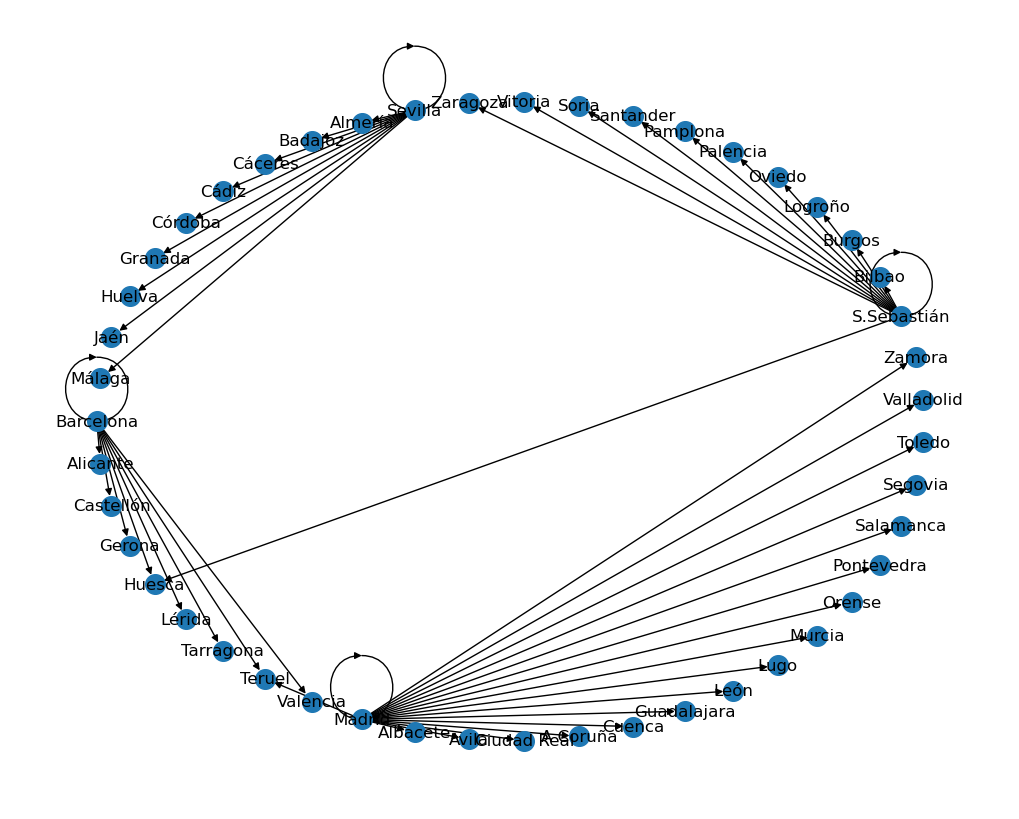

In [10]:
import matplotlib.pyplot as plt

import networkx as nx
rows, cols = np.where(tran >= 1)
edges = zip(rows.tolist(), cols.tolist())
gr = nx.DiGraph()
gr.add_edges_from(edges)
labels ={}
for l in range(len(comunidades)):
    labels[l]=comunidades[l]
plt.figure(figsize=(10,8), dpi=100)
nx.draw_shell(gr, node_size=200, labels=labels,  with_labels=True)
plt.show()
